# Examine R2 Scores for base line candiates 

In [24]:
import joblib
import pickle


from pandas import read_csv, DataFrame
data_path = '/Users/rwspicer/Desktop/data/V1/'

bla_data = read_csv('../results/baseline-models-accuracy.csv', index_col=0)
best_name = bla_data.index[0].replace('.yml','.joblib')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams['font.serif'] = ['Times']
rcParams['font.size'] = 14

In [22]:
best_model = joblib.load(open('/Volumes/toshi-stati/tk-rf-models/baseline-models/' + best_name, 'rb'))
ss_data = pickle.load( open( data_path + 'master-project/training/ACP/v1-1/baseline/ss_training_data.pkl', 'rb'))

In [26]:
X = ss_data['tdp50']['features'].T
y = ss_data['tdp50']['labels']

r2_scores = {}

for idx in bla_data.index:
    cn = idx.replace('.yml','.joblib')
    cm = joblib.load(open('/Volumes/toshi-stati/tk-rf-models/baseline-models/' + cn, 'rb'))
    r2_scores[cn] = cm.score(X, y)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_job

ValueError: If using all scalar values, you must pass an index

In [49]:
## need to fix the index before convering to data frame
r2_temp = {}

for k,v in r2_scores.items():
    r2_temp[k.replace('.joblib','.yml')] = v
r2_scores = r2_temp
    
r2_dataframe = DataFrame.from_dict(r2_scores,orient='index', columns=[['R^2']] )
r2_dataframe.columns=[['R^2']]

In [41]:
r2_dataframe.to_csv('../results/baseline_r2.csv', index_label=False)

In [56]:
bla_data['R^2'] = r2_dataframe[['R^2']]

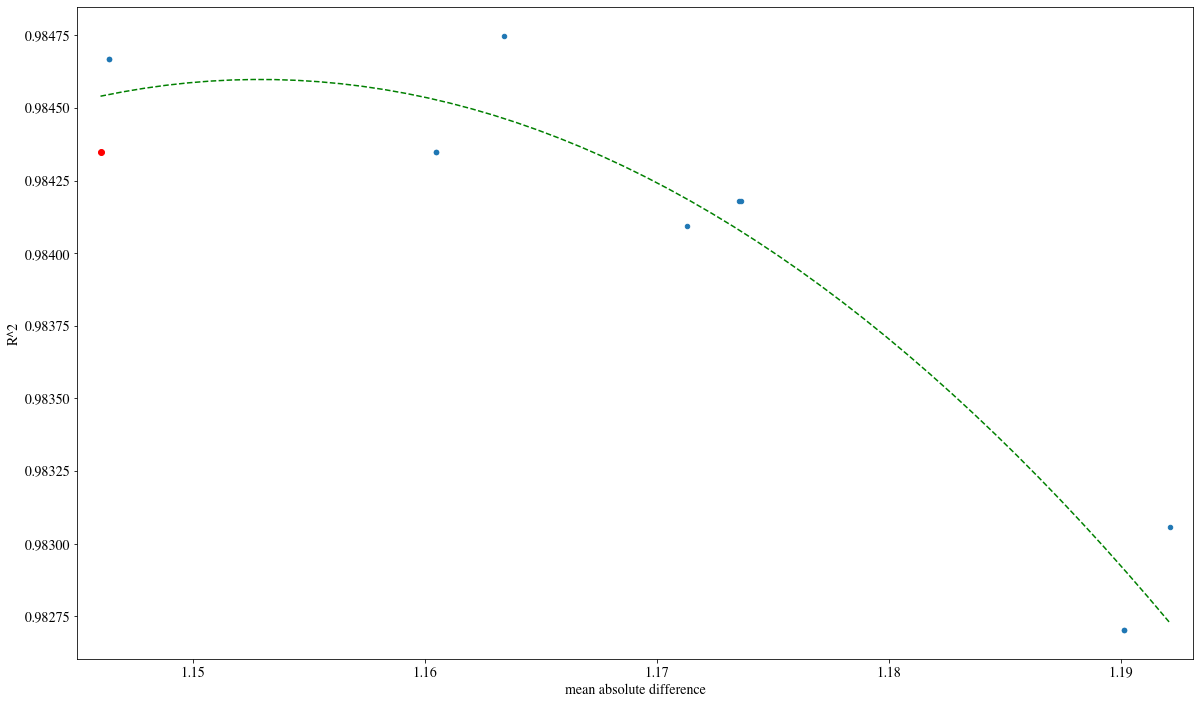

In [112]:


fig, ax = plt.subplots(figsize = (20, 12))
x_col = 'mean absolute difference'
y_col = 'R^2'

x_min = bla_data[x_col].min()
x_max = bla_data[x_col].max()

y_min = bla_data[y_col].min()
y_max = bla_data[y_col].max()

x_buffer = .001
y_buffer = .0001
ax.axis([x_min-x_buffer, x_max+x_buffer, y_min-y_buffer, y_max+y_buffer])
bla_data.plot.scatter(x=x_col,y=y_col, ax=ax)


bx, by = bla_data.iloc[0][['mean absolute difference', 'R^2']]

ax.scatter(x=[bx],y=[by], c='red')



x_data = bla_data[x_col]
y_data = bla_data[y_col]
#curve = lambda  x, a,b,c: a * np.exp(-b * x) + c
linear = lambda  x, m, b: m*x + b
second = lambda x, a,b,c: a*x*x + b*x +c
third = lambda x, a,b,c, d: a*x*x*x + b*x*x + c*x +d 
fourth = lambda x, a,b,c, d, e: a*x*x*x*x + b*x*x*x + c*x*x +d*x +e
curve = second
popt, pcov = optimize.curve_fit(curve, x_data, y_data)

x_data = np.linspace(x_data.min(), x_data.max(), 50)
plt.plot(x_data, curve(x_data, *popt), 'g--')

plt.show()

In [70]:
bla_data

,mean difference,variance of difference,mean absolute difference,variance of absolute difference,training time (hours)
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,-0.002681,3.039994,1.146035,1.726605,0.568037
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,-0.003108,2.976562,1.146401,1.662335,0.564739
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,-0.003108,2.976562,1.146401,1.662335,0.564739
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,-0.001127,2.948703,1.160473,1.602006,1.874627
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,-0.001127,2.948703,1.160473,1.602006,1.882754
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,-0.001199,2.941877,1.163443,1.588280,1.876119
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,-0.002526,3.117974,1.171312,1.746009,1.221215
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,-0.002581,3.101463,1.173560,1.724226,1.224195
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,-0.002567,3.101660,1.173625,1.724271,1.231990
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml,-0.002299,3.199154,1.190155,1.782691,0.268454


In [85]:
sparse = read_csv('../forestpy/param-lists/sparse-list-of-random-forests.csv', index_col=0)
baseline = read_csv('../results/baseline_r2.csv', index_col=0)
# fix names
baseline['r^2'] = baseline['R^2'] 
baseline['mean absolute difference'] = 0.0
for m in list(bla_data.index):
#     print (m)
    try:
        baseline['mean absolute difference'][m]=bla_data['mean absolute difference'][m]
    except:
        pass

sparse['mean absolute difference'] = sparse['abs diff mean']

def reset_sparse(sparse):
    sparse['status'] = 'not run'
    sparse [['computer',
           'train time', 'predict time', 'diff mean', 'abs diff mean', 'diff var',
           'abs diff var', 'median', 'mode', 'training time (hours)']] = ''
    sparse['r^2'] = ''
    return sparse
#     sparse.to_csv('forestpy/param-lists/sparse-list-of-random-forests.csv', index_label='name')

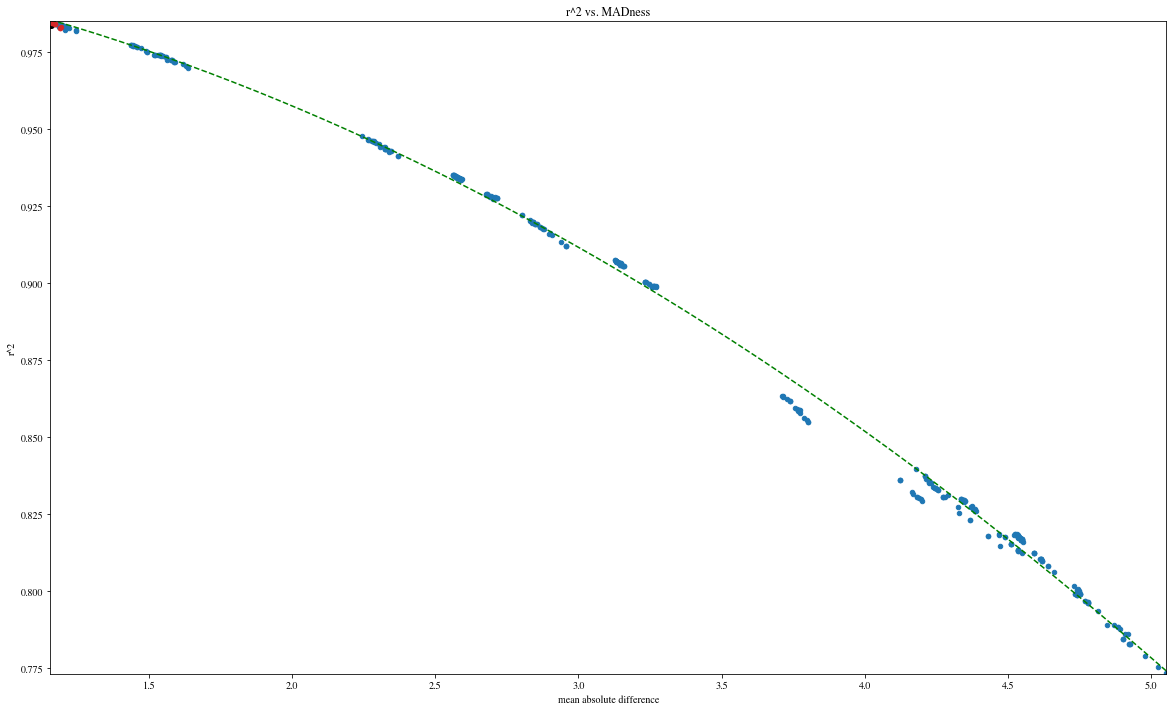

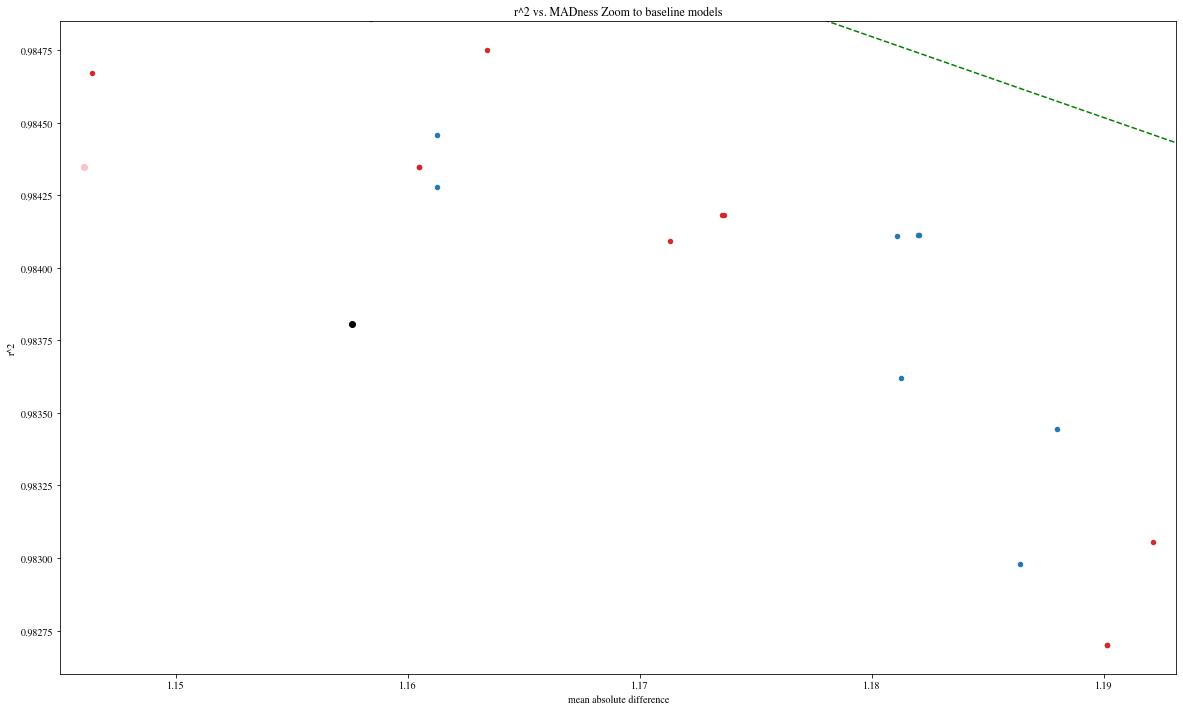

In [98]:
def plot_r2_v_madness(bla_data, fig=None,ax=None, color='tab:blue' ,fit = False, rescale = None, best_color='black'):
    if rescale is None:
        rescale = True if ax is None else False
    if fig is None:
        fig, ax = plt.subplots(figsize = (20, 12))
    x_col = 'mean absolute difference'
    y_col = 'r^2'

    x_min = bla_data[x_col].min()
    x_max = bla_data[x_col].max()

    y_min = bla_data[y_col].min()
    y_max = bla_data[y_col].max()

    x_buffer = .001
    y_buffer = .0001
    if rescale:
        ax.axis([x_min-x_buffer, x_max+x_buffer, y_min-y_buffer, y_max+y_buffer])
    bla_data.plot.scatter(x=x_col,y=y_col, ax=ax, c=color)


    bx, by = bla_data.iloc[0][['mean absolute difference', 'r^2']]

    ax.scatter(x=[bx],y=[by], c=best_color)


    if fit:
        x_data = bla_data[x_col]
        y_data = bla_data[y_col]
        #curve = lambda  x, a,b,c: a * np.exp(-b * x) + c
        linear = lambda  x, m, b: m*x + b
        second = lambda x, a,b,c: a*x*x + b*x +c
        third = lambda x, a,b,c, d: a*x*x*x + b*x*x + c*x +d 
        fourth = lambda x, a,b,c, d, e: a*x*x*x*x + b*x*x*x + c*x*x +d*x +e
        curve = second
        popt, pcov = optimize.curve_fit(curve, x_data, y_data)

        x_data = np.linspace(x_data.min(), x_data.max(), 50)
        ax.plot(x_data, curve(x_data, *popt), 'g--')
    return fig, ax
    
# 

fig, ax = plot_r2_v_madness(sparse, fit = True)
fig, ax = plot_r2_v_madness(baseline, fig, ax, color='tab:red', best_color= 'pink')
ax.set_title ('r^2 vs. MADness')
plt.show()
    
fig, ax = plot_r2_v_madness(sparse, fit = True)
fig, ax = plot_r2_v_madness(baseline, fig, ax, color='tab:red', rescale=True, best_color= 'pink')
ax.set_title( 'r^2 vs. MADness Zoom to baseline models' )
plt.show()

In [55]:

baseline['mean absolute difference']

baseline['mean absolute difference'].shape
# set(baseline['mean absolute difference'].index)

(11,)

In [54]:
bla_data['mean absolute difference'].shape
# set(bla_data['mean absolute difference'].index) 

(12,)

In [51]:
set(baseline['mean absolute difference'].index) ^ set(bla_data['mean absolute difference'].index)  

set()

rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml      1.146035
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml      1.146401
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml      1.146401
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml     1.160473
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml      1.160473
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml     1.163443
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml    1.171312
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml     1.173560
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml     1.173625
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml      1.190155
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml      1.190155
rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml    1.192129
Name: mean absolute difference, dtype: float64

In [67]:
bla_data['mean absolute difference'][list(baseline.index)]

rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml      1.146035
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml      1.146401
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml      1.146401
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml     1.160473
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml      1.160473
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml     1.163443
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml    1.171312
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml     1.173560
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml     1.173625
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml      1.190155
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml      1.190155
rfm_e10_md100_mfAUTO_mln50000_msl4_mss10_tdp50.yml    1.192129
Name: mean absolute difference, dtype: float64

In [69]:
baseline['mean absolute difference'][list(baseline.index)] = bla_data['mean absolute difference'][list(baseline.index)]



/Users/rwspicer/miniconda3/envs/atm-env3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ValueError: cannot set using a list-like indexer with a different length than the value

,R^2,r^2,mean absolute difference
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp25.yml,0.984347,0.984347,1.146035
rfm_e50_md60_mfAUTO_mln50000_msl4_mss5_tdp25.yml,0.984670,0.984670,1.146401
rfm_e50_md100_mfAUTO_mln50000_msl8_mss5_tdp75.yml,0.984347,0.984347,1.160473
rfm_e50_md60_mfAUTO_mln50000_msl8_mss5_tdp75.yml,0.984347,0.984347,1.160473
rfm_e50_md60_mfAUTO_mln50000_msl2_mss10_tdp75.yml,0.984749,0.984749,1.163443
rfm_e100_md25_mfAUTO_mln50000_msl4_mss10_tdp25.yml,0.984093,0.984093,1.171312
rfm_e100_md25_mfAUTO_mln50000_msl2_mss5_tdp25.yml,0.984181,0.984181,1.173560
rfm_e100_md25_mfAUTO_mln50000_msl2_mss2_tdp25.yml,0.984180,0.984180,1.173625
rfm_e10_md60_mfAUTO_mln50000_msl8_mss5_tdp50.yml,0.982702,0.982702,1.190155
rfm_e10_md60_mfAUTO_mln50000_msl8_mss2_tdp50.yml,0.982702,0.982702,1.190155


In [83]:
bla_data = bla_data.drop_duplicates()